In [11]:
import json
import sys
import glob
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [12]:
DIR = "/home/claudio/hdd/git/bachelorThesis/figure_7/"

In [29]:
def categorical_plot(df, key, title, sorted_xs = None):
    if sorted_xs == None:
        xs = set()
        lines = []
        for t in [4,5,6,7,8]:
            xs = xs.union(np.array(df[df.term == t][key]).reshape(-1))
        xs = [str(x) for x in sorted(xs)]
    else:
        xs = sorted_xs
        
    plt.figure(figsize=(10 if key != "n_exec" else 22,8))
    ax = plt.gca()
    lines = []
    for t in [4,5,6,7,8]:
        ys = []
        for x in xs:
            partsum = df[(df.term != -1) & (df[key] == (int(x) if key != "exectime" else x))]["count"].sum().astype(int)
            y = df[(df.term == t) & (df[key] == (int(x) if key != "exectime" else x))]["count"]
            ys.append((y.values.astype(int)[0] / partsum if partsum > 0 else y.values.astype(int)[0]) if y.any() else 0)
        lines.append(ax.plot(xs,ys, marker='.')[0])

    plt.xticks(xs)
    plt.legend(lines, ["EVICT", "FAIL", "FINISH", "KILL", "LOST"],
              bbox_to_anchor=(1,1))
    plt.title(title)
    plt.show()

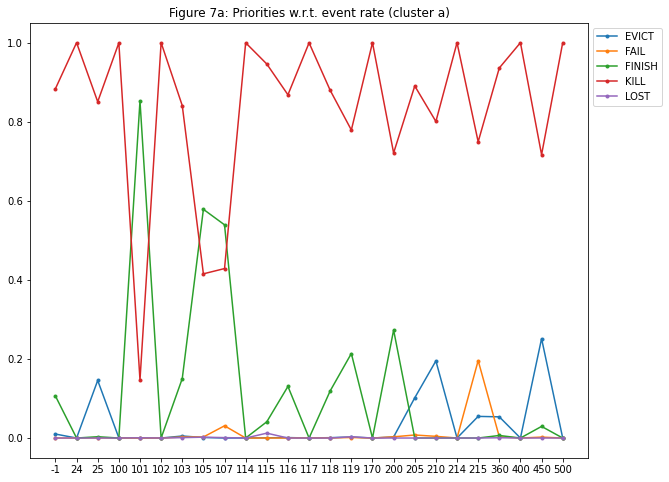

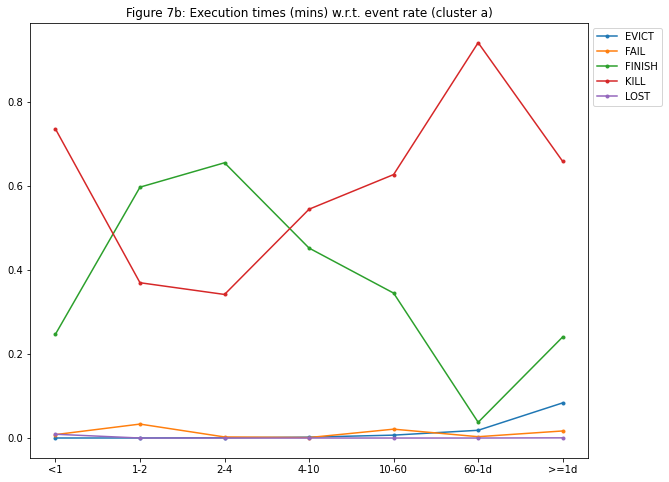

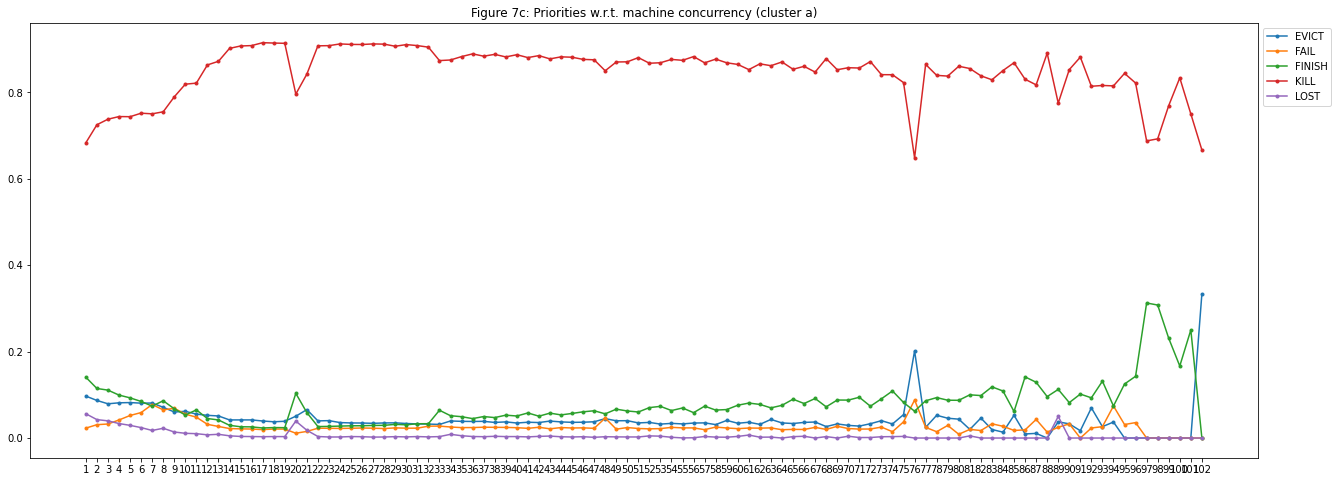

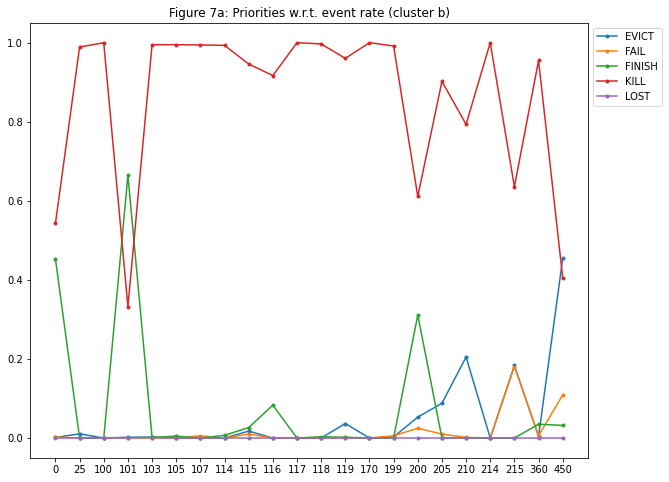

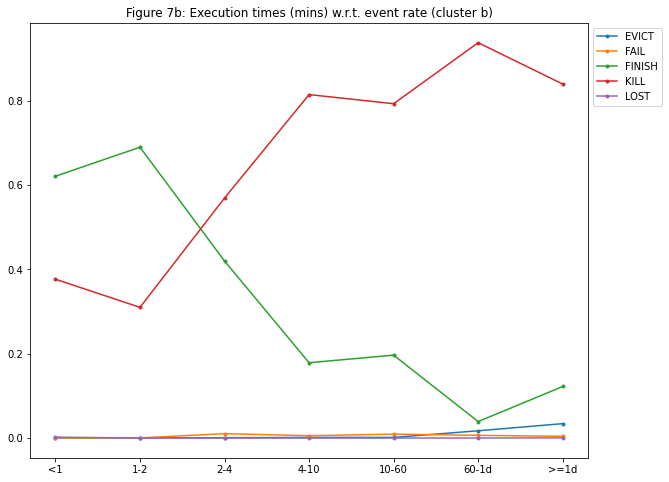

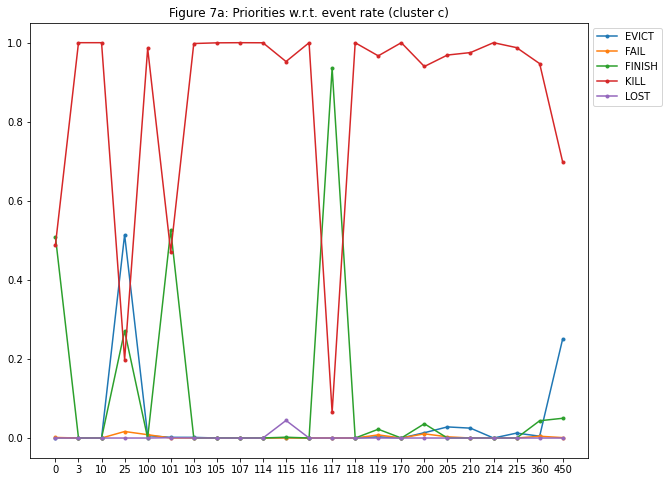

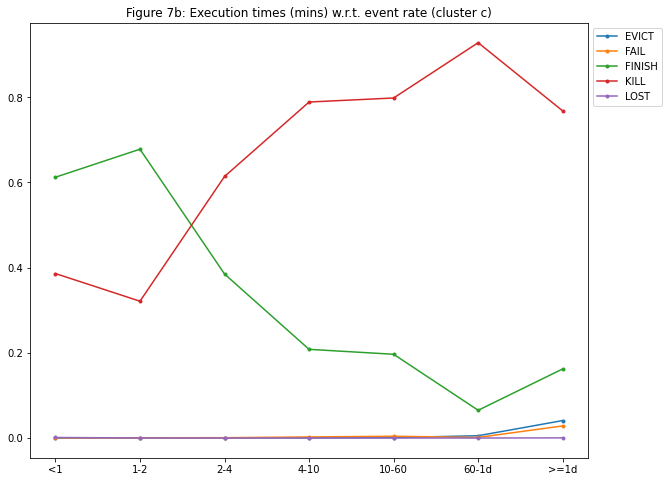

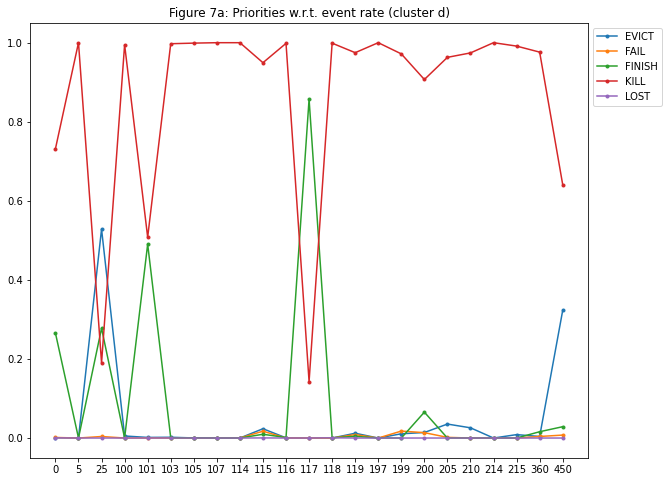

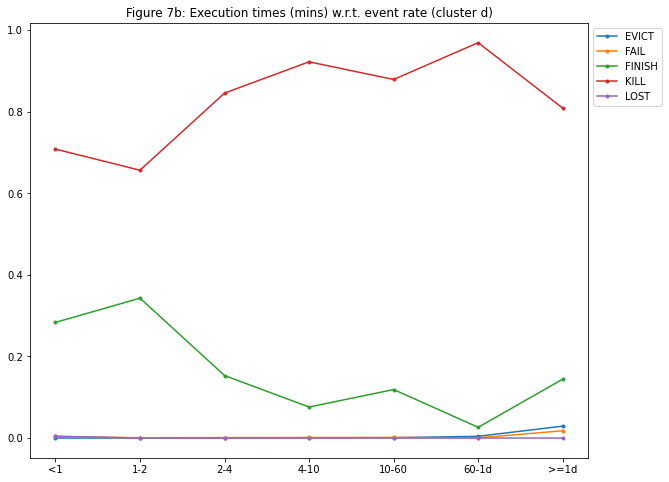

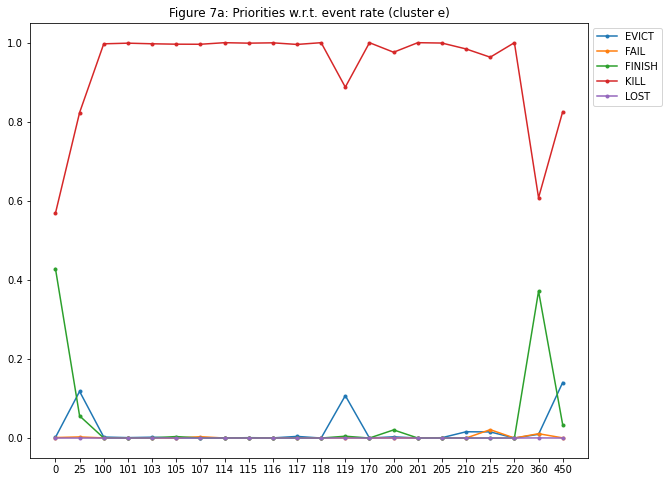

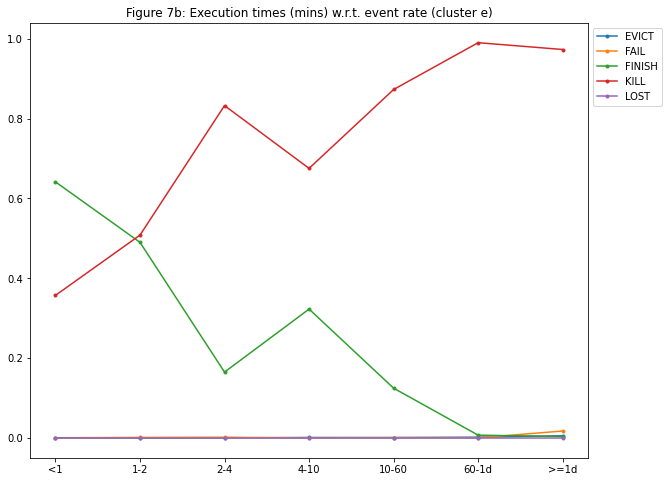

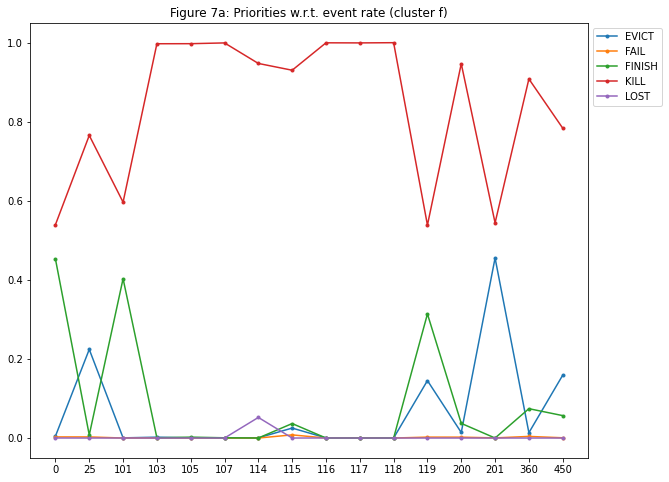

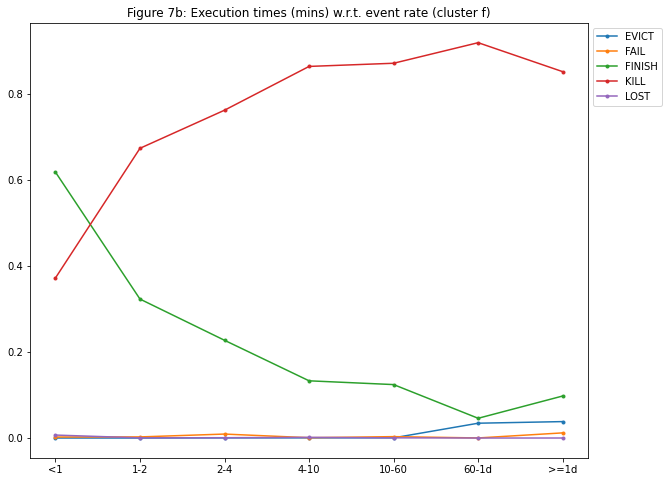

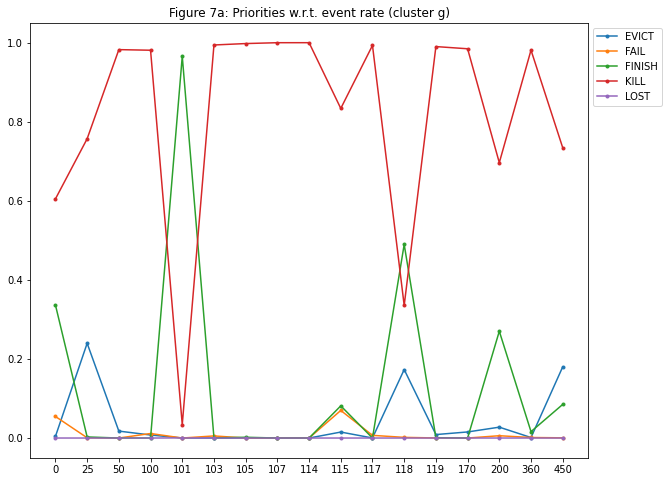

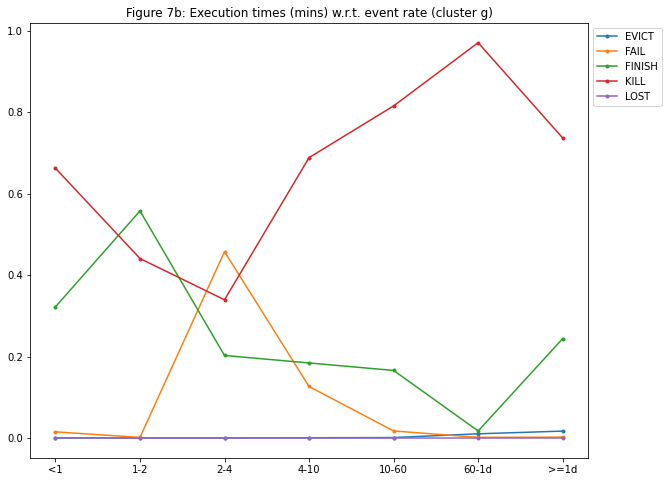

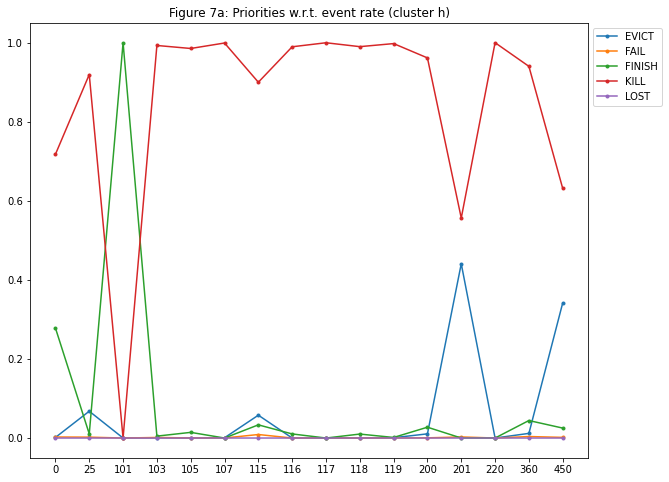

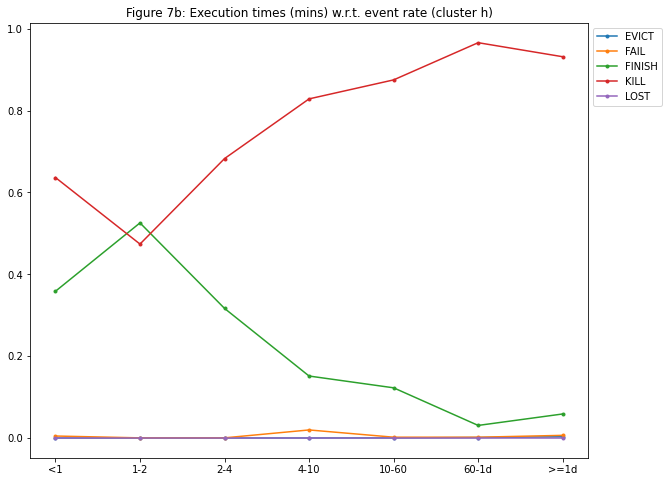

In [30]:
for cluster in "abcdefgh":
    # Processing figure 7a
    
    dfa = pd.read_csv(glob.glob(DIR + cluster + "_priority/part-*")[0], header=None,
                    names=["term", "priority", "count"])
    dfa = dfa.sort_values(["term", "priority"])
    
    categorical_plot(dfa, "priority", "Figure 7a: Priorities w.r.t. event rate (cluster " + cluster + ")")
    
    # Processing figure 7b
    
    dfb = pd.read_csv(glob.glob(DIR + cluster + "_exectime/part-*")[0], header=None,
                names=["term", "ignore", "exectime", "count"])
    del dfb["ignore"]
    dfb = dfb.sort_values(["term", "exectime"])
    
    xs = ["<1", "1-2", "2-4", "4-10", "10-60", "60-1d", ">=1d"]
    categorical_plot(dfb, "exectime", "Figure 7b: Execution times (mins) w.r.t. event rate (cluster " + cluster + ")", xs)

    # Processing figure 7c
    
    if cluster in "a":
        dfc = pd.read_csv(DIR + cluster + "_figure7c.csv", header=0)
        dfc = dfc.sort_values(["term", "n_exec"])

        categorical_plot(dfc, "n_exec", "Figure 7c: Priorities w.r.t. machine concurrency (cluster " + cluster + ")")
   